<B>Todd Weigel HW Week 6</B>

This weeks work was analyzing the data from the historical set: "Davis Sourthern Women's Club".  The data lists 18 women along with 14 clubs that each have some of these women as member (the woman all belong to at least some clubs). 

Below in the first cell, is the sample code which takes a bipartite graph or matrix representation of women and which clubs they belong too, and flattens or projects it into a unipartite graph.

The initial bipartite graph has as nodes, all the clubs and all the women.  The edges represent a connection between an woman and an individual club.

When the list of women and the bipartite graph is projected onto a unipartite graph, we can see all the "friendships" that these women have.  Basically, the unipartite graph developed shows the women and the edges are their friends.  Friends here, means that these woman both have a club (or perhaps clubs) in common in which they belong.

And similarily when the clubs and the bipartite graph is projected into a unipartite graph, the nodes are the clubs and the edges are all the other clubs that the women in its membership belong.

First the code sample code that creates and populates the initial bipartite graph, and then does the project of the women and clubs into a unipartite graph.


In [52]:
"""
Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al
in the 1930s.  They represent observed attendance at 14 social events
by 18 Southern women.  The graph is bipartite (clubs, women).

Data from:
http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm

"""
__author__ = """Aric Hagberg (hagberg@lanl.gov)"""
__date__ = "$Date: 2005-05-12 14:33:11 -0600 (Thu, 12 May 2005) $"
__credits__ = """"""
__revision__ = "$Revision: 998 $"
#    Copyright (C) 2004 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import string
import networkx as nx

def davis_club_graph(create_using=None, **kwds):
    nwomen=14
    nclubs=18
    G=nx.generators.empty_graph(nwomen+nclubs,create_using=create_using,**kwds)
    G.clear()
    G.name="Davis Southern Club Women"

    women="""\
EVELYN
LAURA
THERESA
BRENDA
CHARLOTTE
FRANCES
ELEANOR
PEARL
RUTH
VERNE
MYRNA
KATHERINE
SYLVIA
NORA
HELEN
DOROTHY
OLIVIA
FLORA"""

    clubs="""\
E1
E2
E3
E4
E5
E6
E7
E8
E9
E10
E11
E12
E13
E14"""

    davisdat="""\
1 1 1 1 1 1 0 1 1 0 0 0 0 0
1 1 1 0 1 1 1 1 0 0 0 0 0 0
0 1 1 1 1 1 1 1 1 0 0 0 0 0
1 0 1 1 1 1 1 1 0 0 0 0 0 0
0 0 1 1 1 0 1 0 0 0 0 0 0 0
0 0 1 0 1 1 0 1 0 0 0 0 0 0
0 0 0 0 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 1 0 1 1 0 0 0 0 0
0 0 0 0 1 0 1 1 1 0 0 0 0 0
0 0 0 0 0 0 1 1 1 0 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 1 1 1 0 1 1 1
0 0 0 0 0 0 1 1 1 1 0 1 1 1
0 0 0 0 0 1 1 0 1 1 1 1 1 1
0 0 0 0 0 0 1 1 0 1 1 1 1 1
0 0 0 0 0 0 0 1 1 1 0 1 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0
0 0 0 0 0 0 0 0 1 0 1 0 0 0"""


    # women names
    w={}
    n=0
    for name in women.split('\n'):
        w[n]=name
        n+=1

    # club names
    c={}
    n=0
    for name in clubs.split('\n'):
        c[n]=name
        n+=1

    # parse matrix
    row=0
    for line in davisdat.split('\n'):
        thisrow=list(map(int,line.split(' ')))
        for col in range(0,len(thisrow)):
            if thisrow[col]==1:
                G.add_edge(w[row],c[col])
        row+=1
    return (G,list(w.values()),list(c.values()))

def project(B,pv,result=False,**kwds):
    """
    Returns a graph that is the unipartite projection of the
    bipartite graph B onto the set of nodes given in list pv.

    The nodes retain their names and are connected if they share a
    common node in the vertex set of {B not pv}.

    No attempt is made to verify that the input graph B is bipartite.
    """
    if result:
        G=result
    else:
        G=nx.Graph(**kwds)
    for v in pv:
        G.add_node(v)
        for cv in B.neighbors(v):
            G.add_edges_from([(v,u) for u in B.neighbors(cv)])
    return G

if __name__ == "__main__":
    # return graph and women and clubs lists
    (G,women,clubs)=davis_club_graph()

    # project bipartite graph onto women nodes
    W=project(G,women)
    # project bipartite graph onto club nodes
    C=project(G,clubs)

    print("Degree distributions of projected graphs")
    print('')
    print("Member #Friends")
    for v in W:
        print('%s %d' % (v,W.degree(v)))

    print('')
    print("Clubs #Members")
    for v in C:
        print('%s %d' % (v,C.degree(v)))

Degree distributions of projected graphs

Member #Friends
CHARLOTTE 13
FLORA 14
BRENDA 17
MYRNA 18
PEARL 18
EVELYN 19
THERESA 19
FRANCES 17
LAURA 17
VERNE 19
NORA 19
KATHERINE 18
ELEANOR 17
HELEN 19
DOROTHY 18
OLIVIA 14
SYLVIA 19
RUTH 19

Clubs #Members
E11 10
E10 10
E13 10
E12 10
E14 10
E9 15
E8 15
E5 10
E4 10
E7 15
E6 15
E1 10
E3 10
E2 10


<B>Examine the Bipartite Graph</B>

Plotting the Bipartite graph shows all the nodes of both clubs and women and their connections to each other.  While meaningful, it does nto show connections between women or connections between clubs that are more desirable results of analysis.

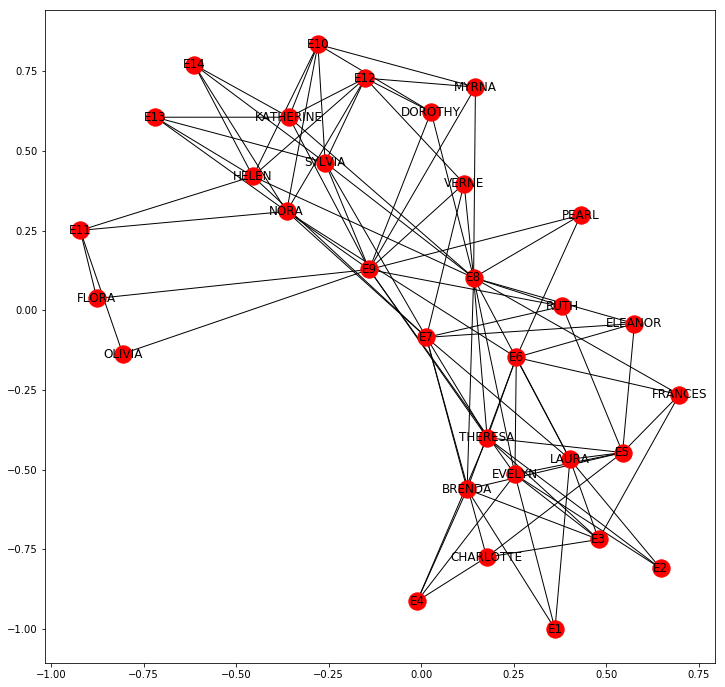

In [53]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]
nx.draw_networkx(G)
plt.show()


<B>Graph of Women's Connections</B>

This graph shows the unipartitioned graph of women and their connections to each other, i.e., the connections show women who are in individual clubs together.  And we can see that all these women have many clubs in common.

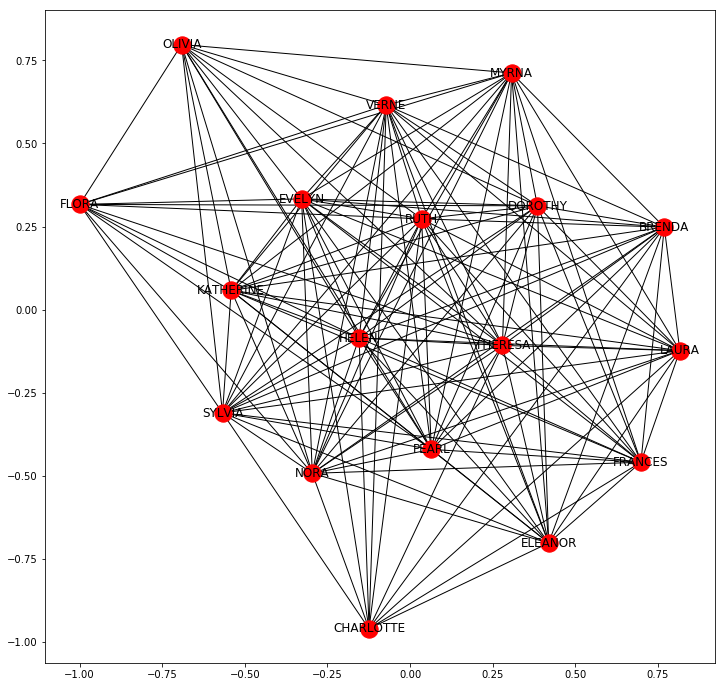

In [54]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]
nx.draw_networkx(W)
plt.show()

<B>Graph of Club's Connections</B>
Next we plot the same thing but for clubs.  here we also see that clubs generally have many women in common.

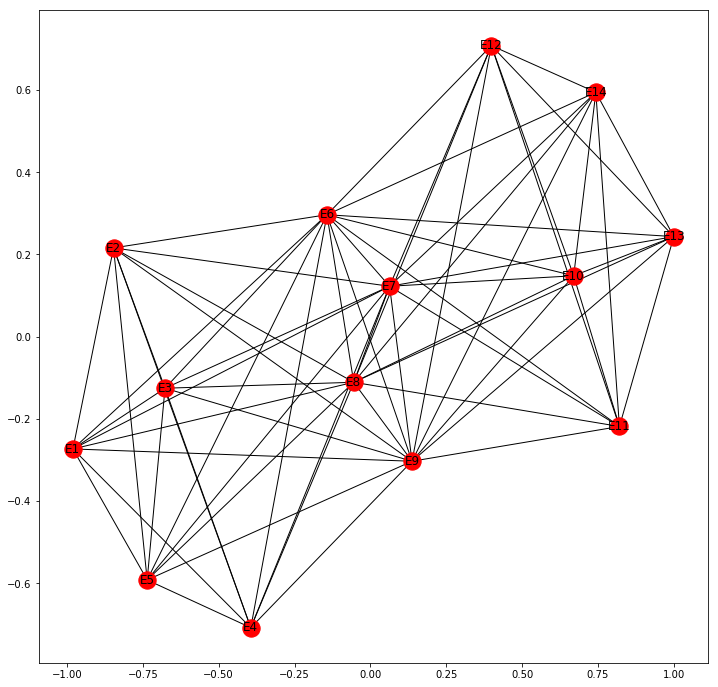

In [55]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]
nx.draw_networkx(C)
plt.show()

<B>Show Weight of Friendship</B>

The problem with the above graphs is that they just show the connections between women or clubs, but not how many connections are in common.  For example, how do we know if Olivia and Flora share one club membership, or are they in a bunch of clubs together.  So let's draw a graph with colors for the edges, with darker colors indicating more connections between the nodes.

If we do that we see that Theresa and Evelyn have the darkest color and therefore the most clubs in common.  While Olivia and Flora don't share more than one or two clubs in common with any other women.

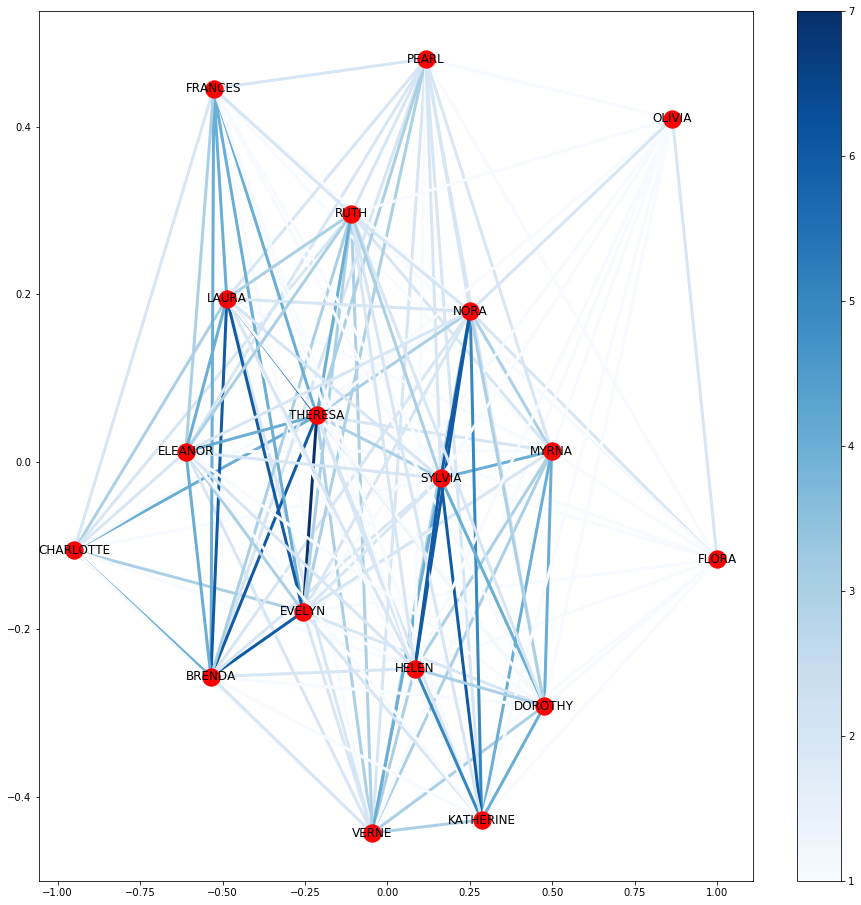

In [56]:
from networkx.algorithms import bipartite as bi
from matplotlib import cm
wg = bi.weighted_projected_graph(G, women)
plt.rcParams['figure.figsize'] = [16, 16]

pos = nx.spring_layout(wg)
edges = nx.draw_networkx_edges(
    wg, pos, edge_cmap=cm.Blues, width=3,
    edge_color=[wg[u][v]['weight'] for u, v in wg.edges])
nx.draw_networkx_nodes(wg, pos)
nx.draw_networkx_labels(wg, pos)

plt.colorbar(edges)
plt.show()


<B>Club Weights</B>

Doing the same things for the club graph, we can now see that E8 and E9 share 9 women in common, while E11 share perhaps two women in common with E9, but otherwise looks like it has 1 women in common at most with other clubs.

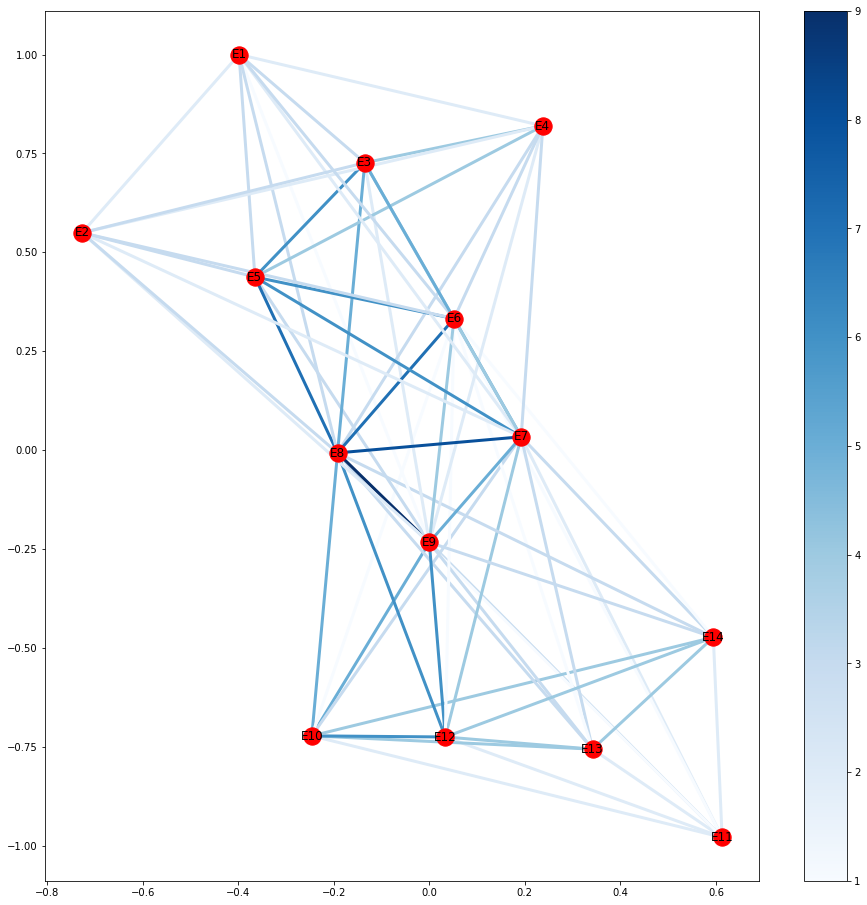

In [57]:
from networkx.algorithms import bipartite as bi
from matplotlib import cm
cg = bi.weighted_projected_graph(G, clubs)
plt.rcParams['figure.figsize'] = [16, 16]

pos = nx.spring_layout(cg)
edges = nx.draw_networkx_edges(
    cg, pos, edge_cmap=cm.Blues, width=3,
    edge_color=[cg[u][v]['weight'] for u, v in cg.edges])
nx.draw_networkx_nodes(cg, pos)
nx.draw_networkx_labels(cg, pos)

plt.colorbar(edges)
plt.show()